# Assignment : Loan Approval Modeling using Logistic Regression

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

In [59]:
dataset = pd.read_csv('https://raw.githubusercontent.com/vin33sh/dm/master/loan.csv');

# Data Analysis

In [60]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Hypothesis

- People with high income tend to repay loan more. Hence they will have a higher loan approval rate.
- Gender is not a factor in loan approval.
- Families with combined higher income tend to get their loans approved.
- Applications with lesser loan amount get loan approved.
- Applications with lesser loan terms get their loans approved
- No of dependents / total income would impact the loan repayment. Hence more the ratio of total income/# of deps, higher the change of loan repayment.
- People with higher education will be given more loans.
- Applications where ratio of loan amount/income is lower would have higher chance of approval.
- Married applicants may be considered more responsible and have higher chance of getting loan approved.
- People with no credit history have lesser probability of getting loans.

In [61]:
#Inspecting columns for the given loan data set
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 12 independent variables and 1 target variable (Loan_Status) that we need to predict.

In [62]:
#Inspecting dimensions of the given dataset
dataset.shape

(614, 13)

In [63]:
#Inspecting data tyoes of all given attributes from the loan dataset
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Observations about data types
*   Applicant Income is of integer type
*   Coapplicant Income, Loan Amount, Loan Term, Credit History are float type.
*   Rest of the attributes are categorical (includes nominal and ordinal)







# Types of Features


###   Categorical features
1. Gender
2. Married
3. Self_Employed
4. Credit_History
5. Loan_Status (*dependent variable*)
---
###   Ordinal features
1. Dependents
2. Education
3. Property_Area
---
###   Numerical features
1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount
4. Loan_Amount_Term


---





# Univariate Analysis

### Categorical Feature Analysis

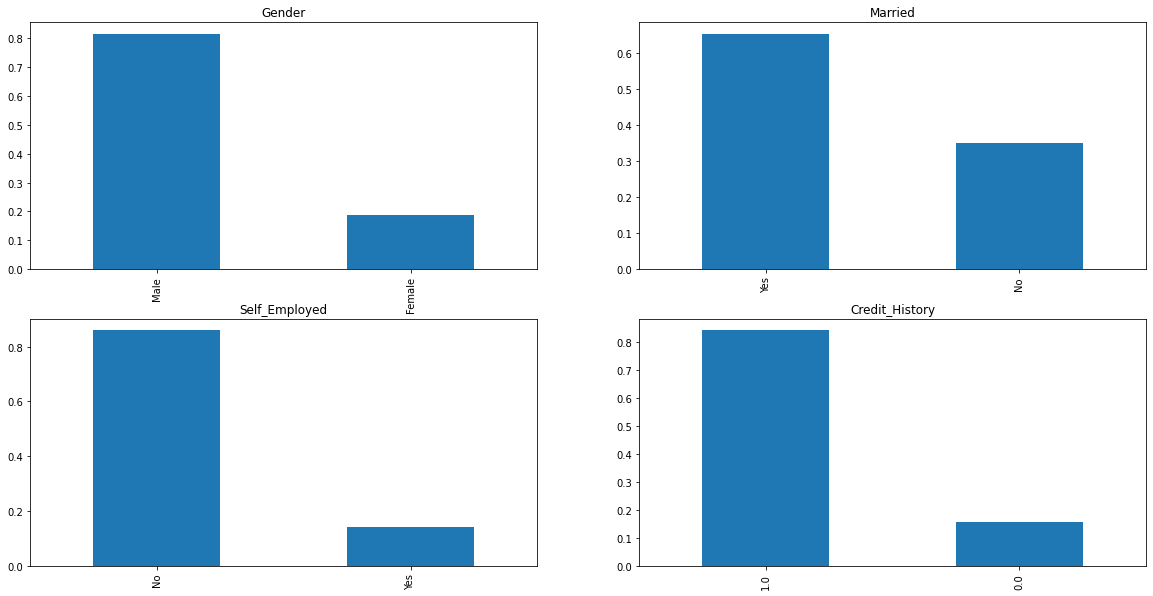

In [64]:
plt.figure(1) 
plt.subplot(221) 
dataset['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222) 
dataset['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223) 
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224) 
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

## Inference


*   Majority of applicants (~80%) are Males
*   Majority of applicants (~65%) are Married
*   Majority of applicants (~85%) are Salaried(not self employed)
*   Majority of applicants (~85%) have good Credit History







---



### Ordinal Feature Analysis

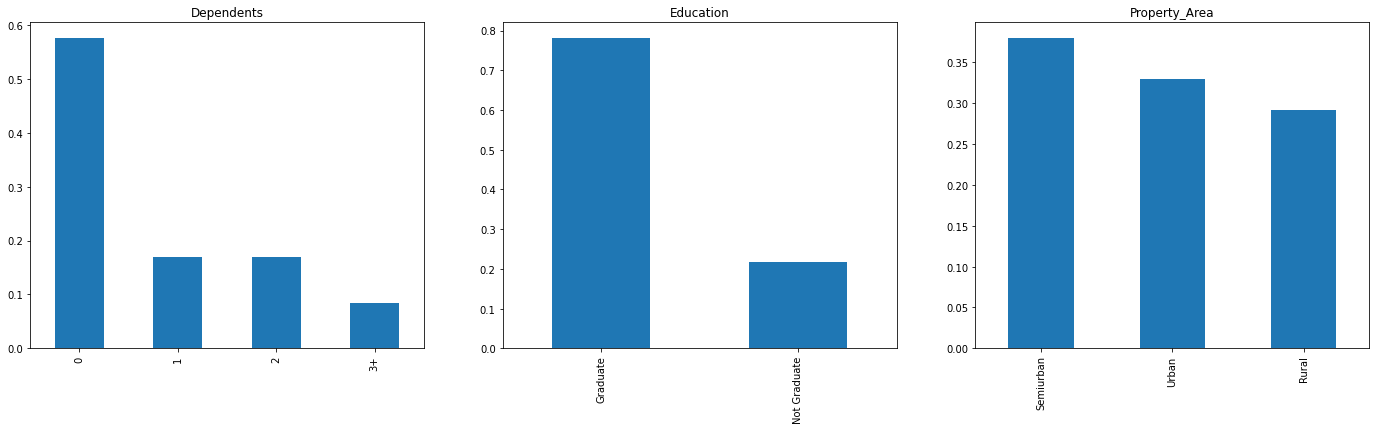

In [65]:
plt.figure(1)
plt.subplot(131)
dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
dataset['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

## Inference
* Majority of the applicants (~58%) dont have any dependents
* Majority of the applicants (~78%) are graduates
* Majority of the applicants (~40%) are from Semi-Urban area



---



### Numerical Feature Analysis

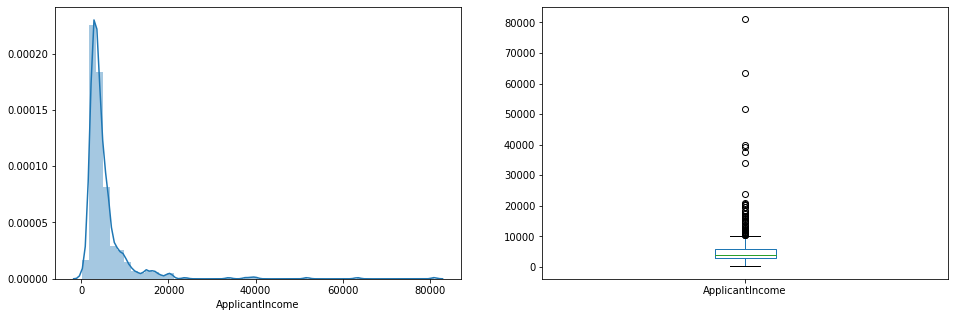

In [66]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['ApplicantIncome']);

plt.subplot(122)
dataset['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Majority of the income is concetrated between 0 & 20000. Outliers in the whisker chart confirm the same. One posible reason could be that higher education might be making a difference.

Text(0.5, 0.98, '')

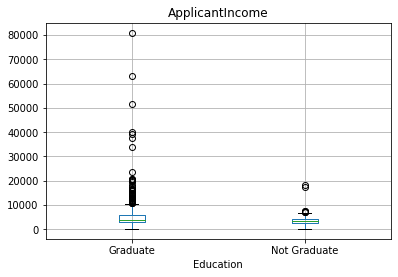

In [67]:
dataset.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

As observed above, outliers seem to be more in the Graduate category which might indicate income disparity between highly educated vs rest.

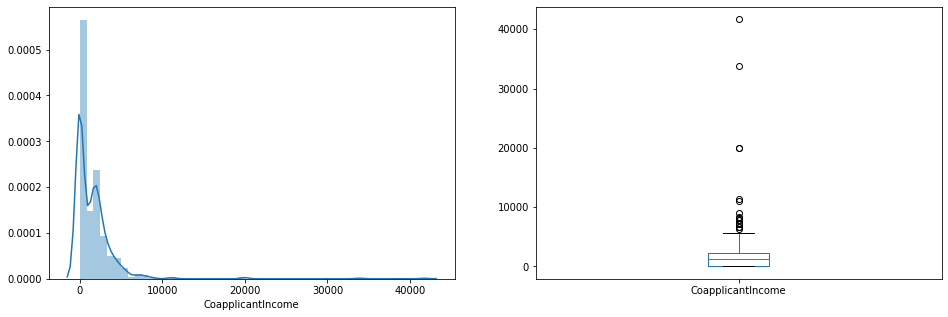

In [68]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['CoapplicantIncome']);

plt.subplot(122)
dataset['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

A similar trend can be observed in the co-applicant income as well. It is not normally distributed. As shown in the whisker chart, there are many outliers here as well.

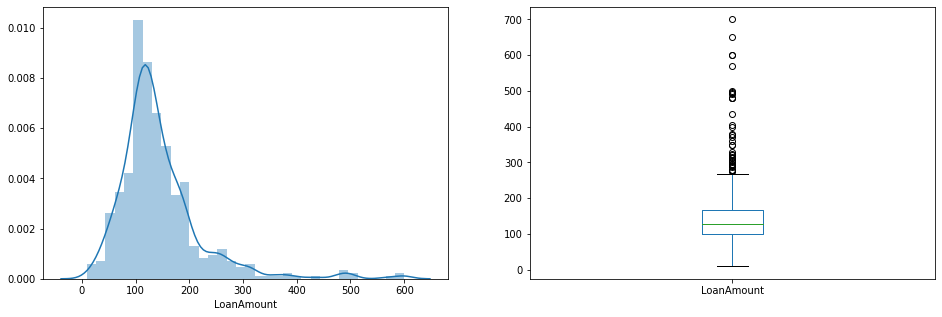

In [69]:
plt.figure(1)
plt.subplot(121)
df=dataset.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
dataset['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

Loan Amount seems to have a failrly normal distribution but it does seem to have high number of outliers.

# Bivariate Analysis

### Analysing Gender Vs Loan Status

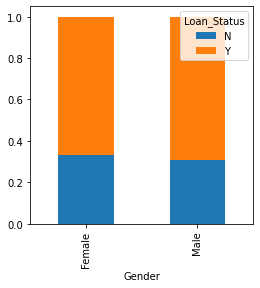

In [70]:
Gender=pd.crosstab(dataset['Gender'], dataset['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Both Male and Female seem to have similar approval rate for Loans

### Married Vs Loan Status

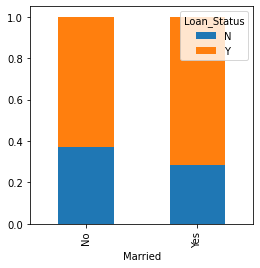

In [71]:
Married=pd.crosstab(dataset['Married'],dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Married applicants seem to have a higher approval rate

### Dependents Vs Loan Status

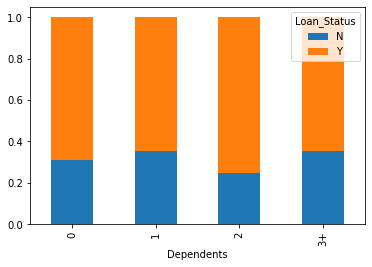

In [72]:
Dependents=pd.crosstab(dataset['Dependents'],dataset['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Dependents with 1 OR 1+ have the least approval rate

### Education Vs Loan Status

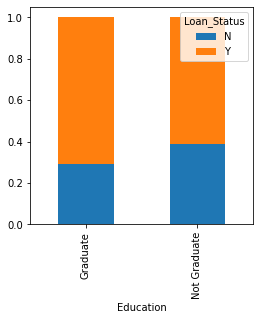

In [73]:
Education=pd.crosstab(dataset['Education'],dataset['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Graduates seem to have a higher loan approval rating.

Employment Type vs Loan Status

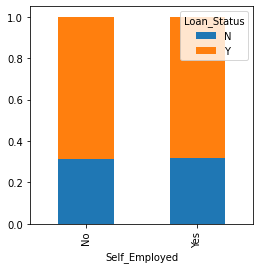

In [74]:
Self_Employed=pd.crosstab(dataset['Self_Employed'],dataset['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Type of employment doesnt seem to make any impact on the loan status

### Credit History Vs Loan Status

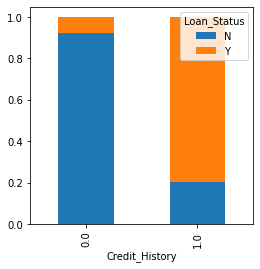

In [75]:
Credit_History=pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

It is very obvious that people with good credit history have a much higher approval rate.

---



### Property Area Vs Loan Status

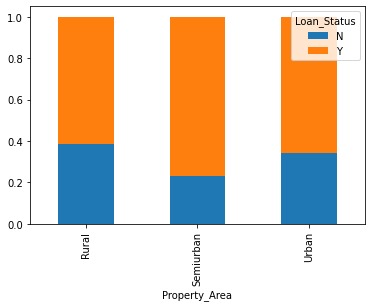

In [76]:
Property_Area=pd.crosstab(dataset['Property_Area'],dataset['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Applications with semi urban property have a higher approval rate

### Income vs Loan Status

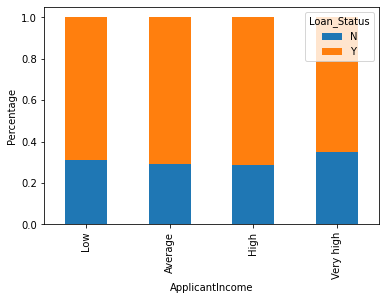

In [77]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
dataset['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(dataset['Income_bin'],dataset['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Even with binning we dont really see any impact of applicant income w.r.t Loan status

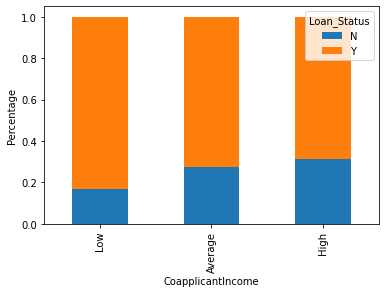

In [78]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
dataset['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(dataset['Coapplicant_Income_bin'],dataset['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

### Combined Income Vs Loan Status

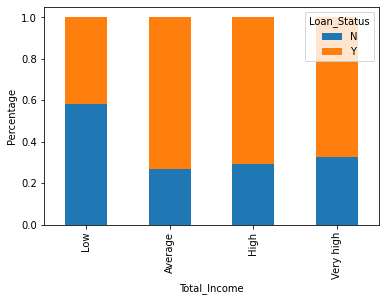

In [79]:
dataset['Total_Income']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
dataset['Total_Income_bin']=pd.cut(dataset['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(dataset['Total_Income_bin'],dataset['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

It clearly shows that lower the combined income of a household, lesser their chances of getting their loan approved.

### Loan Amount Vs Loan Status

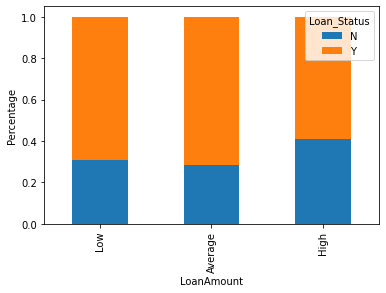

In [80]:
bins=[0,100,200,700]
group=['Low','Average','High']
dataset['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(dataset['LoanAmount_bin'],dataset['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Lower loan amounts have higher approval rate and higher loan amounts have lower approval rate

In [81]:
dataset=dataset.drop(['Income_bin', 'Coapplicant_Income_bin'], axis=1)

### Correlation between all numerical attributes

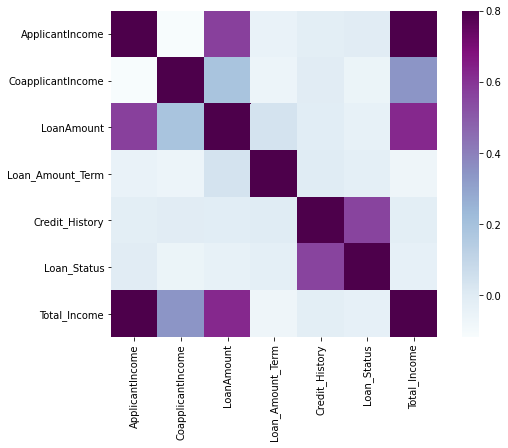

In [82]:
#replacing 3+ to 3 and Y/N=1/0
dataset['Dependents'].replace('3+', 3,inplace=True)
dataset['Loan_Status'].replace('N', 0,inplace=True)
dataset['Loan_Status'].replace('Y', 1,inplace=True)
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We can see Applicant Income vs Loan Amount & Credit History Vs Loan Status are highly correlated

# Data Wrangling

In [83]:
dataset.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Total_Income           0
Total_Income_bin       0
LoanAmount_bin       134
dtype: int64

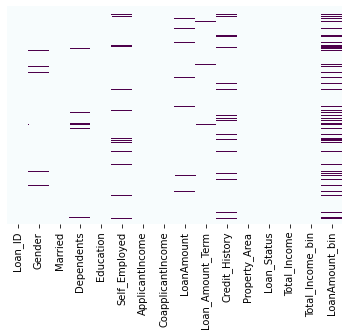

In [84]:
sns.heatmap(dataset.isnull(),yticklabels=False, cmap='BuPu', cbar=False);

In [85]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,High,Average


### Missing value Imputation

In [86]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)


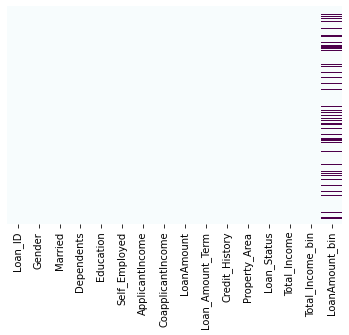

In [87]:
sns.heatmap(dataset.isnull(),yticklabels=False, cmap='BuPu', cbar=False);

Verified that no more NA values exist in the dataset

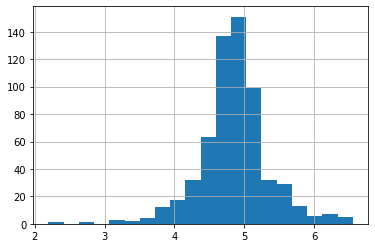

In [88]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)


Log transformation makes the data seem more normal

# Train Data

In [89]:
X = dataset.drop('Loan_Status',1)
y = dataset.Loan_Status

In [90]:
X=pd.get_dummies(X)
#dataset=pd.get_dummies(dataset)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
predictions = model.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.45      0.59        53\n           1       0.77      0.96      0.85       101\n\n    accuracy                           0.79       154\n   macro avg       0.81      0.71      0.72       154\nweighted avg       0.80      0.79      0.76       154\n'

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7857142857142857

This model is giving ~78% accuracy for logistic regression

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[24, 29],
       [ 4, 97]])

Shown above is the corresponding confusion matrix

In [98]:
newdataset = pd.read_csv('https://raw.githubusercontent.com/vin33sh/dm/master/loan.csv');

# Feature Engineering

### Total Income 

In [99]:
dataset['Total_Income']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']

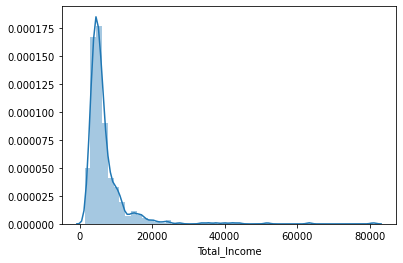

In [100]:
sns.distplot(dataset['Total_Income']);

Distribution is right skewed.

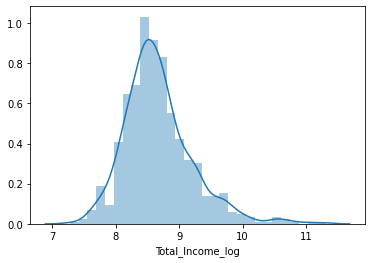

In [101]:
dataset['Total_Income_log'] = np.log(dataset['Total_Income'])
sns.distplot(dataset['Total_Income_log']);

After applying log transformation it seems much more normalized

### EMI

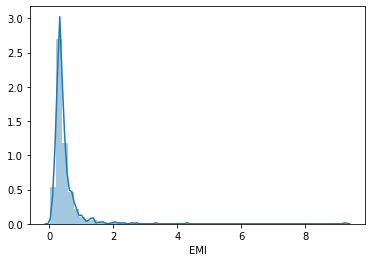

In [102]:
dataset['EMI']=dataset['LoanAmount']/dataset['Loan_Amount_Term']
sns.distplot(dataset['EMI']);

### Balance Income

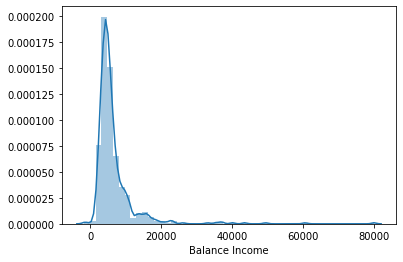

In [103]:
dataset['Balance Income']=dataset['Total_Income']-(dataset['EMI']*1000) # Multiply with 1000 to make the units equal 
sns.distplot(dataset['Balance Income']);

Dropping all the used columns that were used to create new Features

In [104]:
dataset=dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,LoanAmount_bin,LoanAmount_log,Total_Income_log,EMI,Balance Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,High,NaN,4.852030,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,Very high,Average,4.852030,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,Average,Low,4.189655,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,High,Average,4.787492,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,High,Average,4.948760,8.699515,0.391667,5608.333333


# Optimized Model Building

In [105]:
from sklearn.model_selection import StratifiedKFold


In [106]:
i=1

accuracy_scores = []

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1,max_iter=10000)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     accuracy_scores.append(score)
     i+=1

print('Average accuracy : ', sum(accuracy_scores)/len(accuracy_scores))


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.8032786885245902
Average accuracy :  0.8029321604691457




---




## There is an improvment of 2% (80.29%-78%) based on the new Features that were created above.

